In [1]:
import pandas as pd

In [2]:
# data source: https://www.iedb.org/downloader.php?file_name=doc/bcr_full_v3.zip
df = pd.read_csv("../data/bcr_full_v3.csv", header=1)
print(df.shape)
df.head()

(8604, 70)


/tmp/ipykernel_242743/3172264868.py:2: DtypeWarning: Columns (14,18,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/bcr_full_v3.csv", header=1)


,Group IRI,IEDB Receptor ID,Reference Name,Type,IEDB IRI,IEDB IRI.1,Name,Source Molecule,Source Organism,Type.1,...,CDR1 Start Curated.1,CDR1 End Curated.1,CDR1 Start Calculated.1,CDR1 End Calculated.1,CDR2 Curated.1,CDR2 Calculated.1,CDR2 Start Curated.1,CDR2 End Curated.1,CDR2 Start Calculated.1,CDR2 End Calculated.1
0,http://www.iedb.org/receptor/1,1,26-2F,heavylight,http://www.iedb.org/reference/279,http://www.iedb.org/epitope/2134780,"G58, L59, S61, P62, C63, K64, D65, G109, G110,...",Angiogenin,Homo sapiens (human),B cell,...,NaN,NaN,27.0,36.0,NaN,AAS,NaN,NaN,54.0,56.0
1,http://www.iedb.org/receptor/2,2,LA-2,heavylight,http://www.iedb.org/reference/280,http://www.iedb.org/epitope/190616,"S206, S207, A208, A209, T210, K211, K212, T213...",Outer surface protein A,Borreliella burgdorferi (Lyme disease spirochete),B cell,...,NaN,NaN,27.0,32.0,NaN,YTS,NaN,NaN,50.0,52.0
2,http://www.iedb.org/receptor/3,3,OKT3,heavylight,http://www.iedb.org/reference/310,http://www.iedb.org/epitope/2134650,"E56, G68, E70, R101, G102, S103, K104, P105, D107",T-cell surface glycoprotein CD3 epsilon chain,Homo sapiens (human),B cell,...,NaN,NaN,27.0,31.0,NaN,DTS,NaN,NaN,49.0,51.0
3,http://www.iedb.org/receptor/4,4,Fab-12 variant Y0317,heavylight,http://www.iedb.org/reference/312,http://www.iedb.org/epitope/2135423,"V: F43; W: Y71, K74, Q105, I106, M107, R108, I...",VEGF homodimer,Homo sapiens (human),B cell,...,NaN,NaN,27.0,32.0,NaN,FTS,NaN,NaN,50.0,52.0
4,http://www.iedb.org/receptor/4,4,Fab-12 variant Y0317,heavylight,http://www.iedb.org/reference/312,http://www.iedb.org/epitope/2135423,"V: F43; W: Y71, K74, Q105, I106, M107, R108, I...",VEGF homodimer,Homo sapiens (human),B cell,...,NaN,NaN,27.0,32.0,NaN,FTS,NaN,NaN,50.0,52.0


In [3]:
# human BCRs
bcr = df.loc[df["Organism IRI"] == "http://purl.obolibrary.org/obo/NCBITaxon_9606"]
bcr.shape

(5005, 70)

In [4]:
# clean up
bcr = bcr.dropna(subset=["Source Molecule", "Source Organism"])

In [5]:
bcr["Source Organism"].value_counts()[:20]

Source Organism
Homo sapiens (human)                                                                                        887
Sus scrofa (pig)                                                                                            779
SARS-CoV2                                                                                                   552
Human immunodeficiency virus 1 (human immunodeficiency virus 1 HIV-1)                                       395
Plasmodium falciparum (malaria parasite P. falciparum)                                                      272
Zaire ebolavirus Makona (Ebola virus Makona)                                                                 92
Arachis hypogaea (peanut)                                                                                    86
SARS-CoV2 Omicron                                                                                            72
Ebola virus - Mayinga, Zaire, 1976 (Ebola virus (strain Zaire Mayinga))                 

In [6]:
# COVID BCRs
covid = bcr.loc[bcr["Source Organism"] == "SARS-CoV2"]
covid["target"] = "SARS-CoV2"
covid.shape

/tmp/ipykernel_242743/2511444610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["target"] = "SARS-CoV2"


(552, 71)

In [7]:
# HIV-1 BCRs
hiv1 = bcr.loc[
    bcr["Source Organism"]
    == "Human immunodeficiency virus 1 (human immunodeficiency virus 1 HIV-1)"
]
hiv1["target"] = "HIV-1"
hiv1.shape

/tmp/ipykernel_242743/240145424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiv1["target"] = "HIV-1"


(395, 71)

In [8]:
# concat both
data = pd.concat([covid, hiv1])
data.shape

(947, 71)

In [9]:
# use heavy chain sequence only and remove duplicated sequences
data = data.dropna(subset="Protein Sequence").drop_duplicates(subset="Protein Sequence")
data.shape

(509, 71)

In [10]:
data["Source Organism"].value_counts()

Source Organism
SARS-CoV2                                                                313
Human immunodeficiency virus 1 (human immunodeficiency virus 1 HIV-1)    196
Name: count, dtype: int64

In [11]:
# subset columns
data = data.loc[:, ["Protein Sequence", "target"]]
data.columns = ["sequence", "target"]
data.head()

,sequence,target
3513,QMQLVQSGTEVKKPGESLKISCKGSGYGFITYWIGWVRQMPGKGLE...,SARS-CoV2
3908,EVQLVESGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,SARS-CoV2
3909,EVQLVESGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,SARS-CoV2
4420,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SARS-CoV2
4421,QVQLVQSGGGLVKPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,SARS-CoV2


In [12]:
data["target"].value_counts()

target
SARS-CoV2    313
HIV-1        196
Name: count, dtype: int64

In [13]:
# down sample SARS-CoV2 to make the dataset more balanced
data = pd.concat(
    [
        data.loc[data["target"] == "SARS-CoV2"].sample(n=200, random_state=0),
        data.loc[data["target"] == "HIV-1"],
    ]
)
data["target"].value_counts()

target
SARS-CoV2    200
HIV-1        196
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

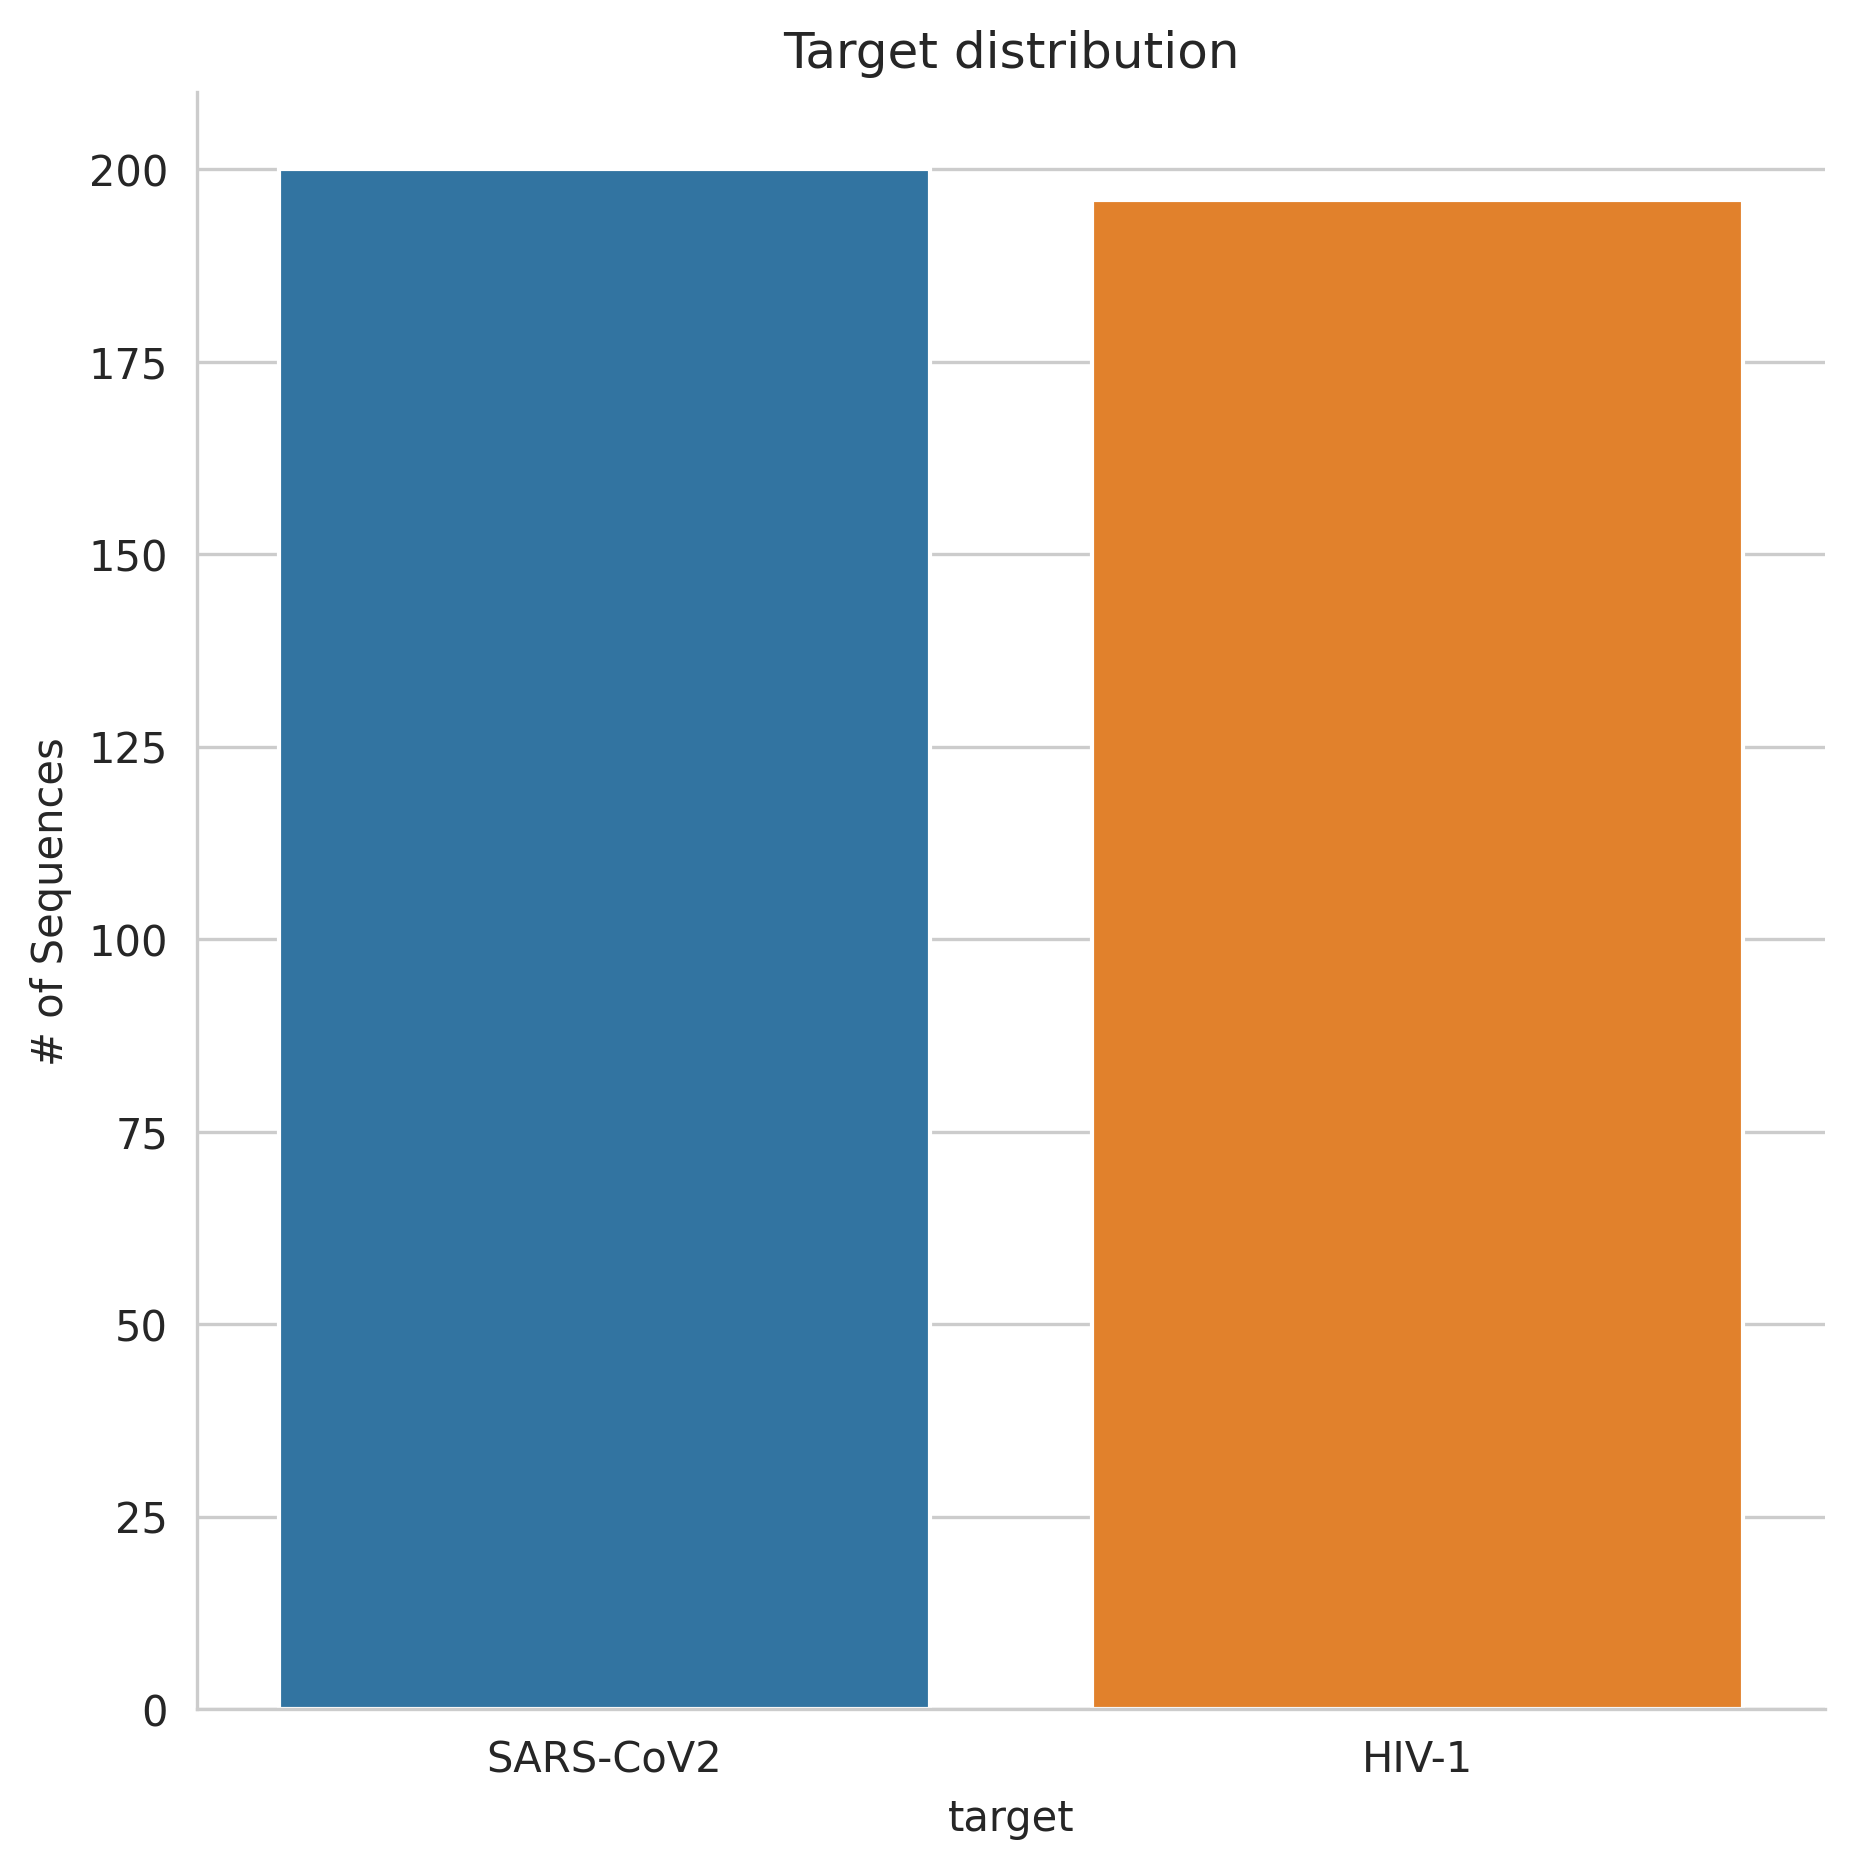

In [15]:
plt.figure(figsize=(7, 7), dpi=300)
ax = sns.countplot(x="target", data=data, hue="target")
plt.title("Target distribution")
plt.ylabel("# of Sequences")
sns.despine()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# split into train and test sets, stratified by target
train, test = train_test_split(
    data, stratify=data["target"], random_state=0, test_size=0.15
)

In [18]:
train.shape, test.shape

((336, 2), (60, 2))

In [19]:
data.to_parquet("../data/bcr.parquet")
train.to_parquet("../data/bcr_train.parquet")
test.to_parquet("../data/bcr_test.parquet")